Model trained on largeSimpleBoolean5.
Score on largeSimpleBoolean5:
```
python -m encoders.evaluation.knnstats rnnsupervisedencoder-largeSimpleBoolean5.pkl expressions-synthetic/split/largeSimpleBoolean5-testset.json.gz expressions-synthetic/largeSimpleBoolean5.json.gz 
Avg Semantically Equivalent NNs: [1.         0.99954338 0.99908676 0.90251142 0.89949772 0.89604262
   0.89391172 0.8906583  0.88751903 0.88436834 0.88145842 0.85585997
   0.85308805 0.8500598  0.84682648]
```
Evaluation on a generated dataset, #vars=7, operators &|~, expression size=7.
Score unknown (out of memory when trying to evaluate)

In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-largeSimpleBoolean5.pkl"
VALIDATION_DATA = "../simple-bool-7-vars-size-7.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    a = Node("a", (), "a", parent=and_)
    and_.set_children_for_property("right", [a])
    not_a = Node("Not", ("child",), "~b", parent=and_)
    a2 = Node("a", (), "a", parent=not_a)
    not_a.set_children_for_property("child", [a])
    and_.set_children_for_property("left", [not_a])
    return '(~a)&a', false
    
print(get_false()[1].__str__())

-Start (False)
| \+child
|   \-And (False)
|     |+left
|     | \-Not (~b)
|     |   \+child
|     |     \-a (a)
|     \+right
|       \-a (a)



In [8]:
false = get_false()
false_encoding = encoder.get_encoding(false)
false_encoding

array([-0.1960423 , -0.0597016 ,  0.10817568, -0.20674889, -0.14668898,
       -0.08773808,  0.22804497, -0.06213606,  0.00242278,  0.06394491,
        0.19929108,  0.18828212,  0.02379007,  0.04865761, -0.19654894,
       -0.11998216,  0.08925965,  0.01718649,  0.05861029,  0.00706447,
       -0.12132342, -0.22200795,  0.11966132,  0.04983344,  0.10458691,
       -0.02135976, -0.21771303,  0.07927623,  0.02703363,  0.2659228 ,
        0.00587731,  0.01313335, -0.13217513,  0.01719432,  0.31173056,
        0.03155298, -0.11602205,  0.2083896 , -0.10313212,  0.07637571,
        0.13771461,  0.0189364 ,  0.25914642,  0.05011457,  0.08382471,
        0.02259994,  0.02965746, -0.07631625,  0.15353608,  0.03238746,
        0.15845671,  0.09974609, -0.03621064, -0.15151568, -0.02227136,
        0.11039952,  0.04599165, -0.05298055,  0.03593728,  0.04826833,
        0.17704526,  0.03353791, -0.15405194, -0.00768145], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 100)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.444305,~d | (a & b),"[(, a, &, b, ), |, (, ~, d, )]"
1,1.434247,~d | (a & b),"[(, b, &, a, ), |, (, ~, d, )]"
2,1.438907,~d | (a & b),"[(, ~, d, ), |, (, a, &, b, )]"
3,1.431361,~d | (a & b),"[(, ~, d, ), |, (, b, &, a, )]"
4,1.388341,~d | (a & b),"[~, (, d, &, (, ~, (, a, &, b, ), ), )]"
5,1.386562,~d | (a & b),"[~, (, d, &, (, ~, (, b, &, a, ), ), )]"
6,1.376281,~d | (a & b),"[~, (, (, ~, (, a, &, b, ), ), &, d, )]"
7,1.372230,~d | (a & b),"[~, (, (, ~, (, b, &, a, ), ), &, d, )]"
8,1.533438,b | (e & f & g),"[b, |, (, e, &, (, f, &, g, ), )]"
9,1.535830,b | (e & f & g),"[b, |, (, e, &, (, g, &, f, ), )]"


In [12]:
pandas.set_option('max_rows', 500)
df = pandas.DataFrame(table)
df[df.eq_class == 'False']

,dist,eq_class,expression
7071,1.277303,False,"[(, (, ~, c, ), &, c, ), &, f]"
7072,1.332517,False,"[(, ~, a, ), &, (, a, &, d, )]"
7073,1.437463,False,"[~, (, (, e, |, (, ~, g, ), ), |, g, )]"
7074,1.382197,False,"[~, (, g, |, (, ~, (, g, &, d, ), ), )]"
7075,1.297267,False,"[(, ~, (, (, ~, g, ), |, d, ), ), &, d]"
7076,1.381671,False,"[~, (, g, |, (, (, ~, g, ), |, c, ), )]"
7077,1.318700,False,"[(, ~, a, ), &, (, (, ~, e, ), &, e, )]"
7078,1.411349,False,"[a, &, (, e, &, (, ~, a, ), )]"
7079,1.304829,False,"[(, a, &, d, ), &, (, ~, a, )]"
7080,1.405207,False,"[a, &, (, f, &, (, ~, a, ), )]"


In [13]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

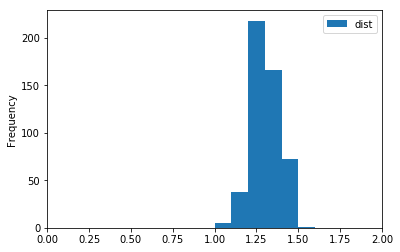

In [14]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

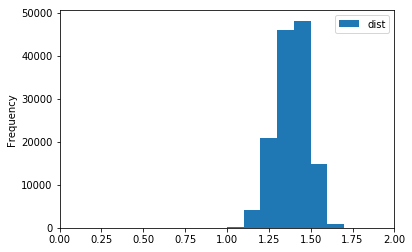

In [15]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

Conclusions: the difference is significant, but small. Maybe the model doesn't generalise well on the dataset with larger tree size (5 versus 7). Next step: try this out with dataset with tree size 5.